# Plotting Polarisation and Movement Vectors

The `temul.topotem.polarisation` module allows one to visualise the
polarisation/movement of atoms in an atomic resolution image. In this tutorial,
we will use a dummy dataset to show the different ways the `plot_polarisation_vectors`
function can display data. In future, tutorials on published experimental data
will also be available.

## Prepare and Plot the dummy dataset


In [1]:
# choose your matplotlib backend. qt will plot in a separate window.
%matplotlib qt

import matplotlib.pyplot as plt
plt.style.use("grayscale")

from matplotlib.colors import from_levels_and_colors
# import temul.api as tml
from dummy_data import get_polarisation_dummy_dataset

C:\Users\gerit\miniconda3\envs\TopoTEM\lib\site-packages\atomap\tools.py:919: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit()


In [2]:
atom_lattice = get_polarisation_dummy_dataset(image_noise=True)
sublatticeA = atom_lattice.sublattice_list[0]
sublatticeB = atom_lattice.sublattice_list[1]
image = sublatticeA.signal
# image.plot()

In [3]:
# It is best when the image is calibrated.
# Your image may already be calibrated, but if not, use Hyperspy's `axes_manager` for calibration.

sampling = 0.1  # example of 0.1 nm/pix
units = 'nm'
image.axes_manager[-1].scale = sampling
image.axes_manager[-2].scale = sampling
image.axes_manager[-1].units = units
image.axes_manager[-2].units = units
# image.plot()

# Zoom in on the image to see how the atoms look in the different regions.

## Find the Vector Coordinates using Atomap

Using the Atomap (https://atomap.org/) package, we can easily get the polarisation vectors for regular structures.


In [4]:
sublatticeA.construct_zone_axes()
za0, za1 = sublatticeA.zones_axis_average_distances[0:2]

s_p = sublatticeA.get_polarization_from_second_sublattice(
    za0, za1, sublatticeB, color='blue')

vector_list = s_p.metadata.vector_list
x, y = [i[0] for i in vector_list], [i[1] for i in vector_list]
u, v = [i[2] for i in vector_list], [i[3] for i in vector_list]

Now we can display all of the variations that `plot_polarisation_vectors`
gives us! You can specify sampling (scale) and units, or use a calibrated image
so that they are automatically set.

In [5]:
from polarisation import plot_polarisation_vectors

In [6]:
# Vector magnitude plot with red arrows:

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, save=None,
                          plot_style='vector', color='r',
                          overlay=False, title='Vector Arrows',
                          monitor_dpi=50)


<Axes: title={'left': 'Vector Arrows'}>

In [7]:
# Vector magnitude plot with red arrows overlaid on the image, no title:

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, save=None,
                          plot_style='vector', color='r',
                          overlay=True, monitor_dpi=50)

<Axes: >

In [8]:
#Vector magnitude plot with colormap viridis:

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, save=None,
                          plot_style='colormap', monitor_dpi=50,
                          overlay=False, cmap='viridis')


Why is this happening??


<Axes: >

In [ ]:
#Vector angle plot with colormap viridis (:python:`vector_rep='angle'`):

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, save=None,
                          plot_style='colormap', monitor_dpi=50,
                          overlay=False, cmap='cet_colorwheel',
                          vector_rep="angle", degrees=True)


<IPython.core.display.Javascript object>


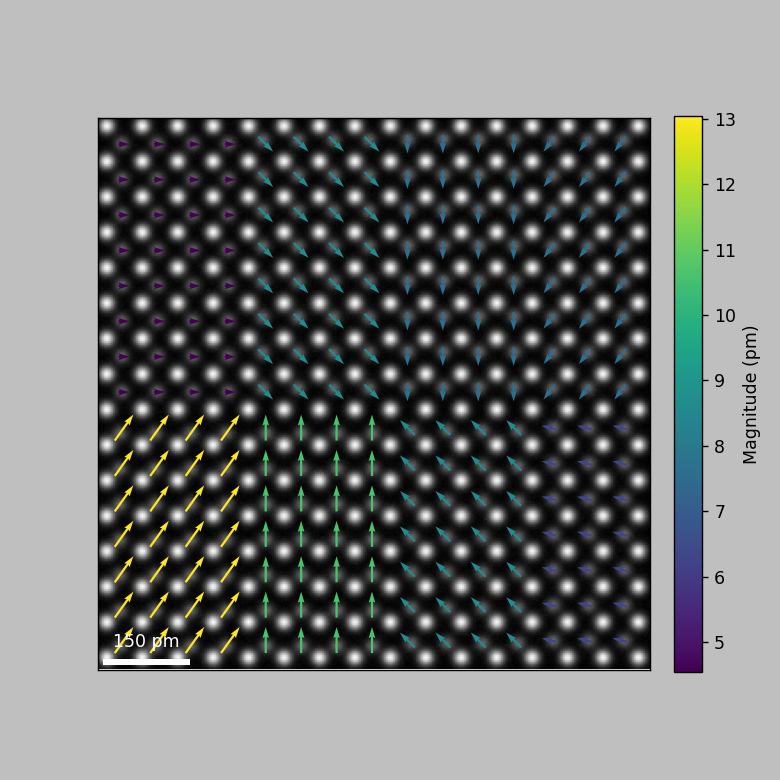

<AxesSubplot:>

In [9]:
# Colormap arrows with sampling specified in the parameters and with scalebar:

tml.plot_polarisation_vectors(x, y, u, v, image=sublatticeA.image,
                          sampling=3.0321, units='pm', monitor_dpi=50,
                          unit_vector=False, plot_style='colormap',
                          overlay=True, save=None, cmap='viridis',
                          scalebar=True)


<IPython.core.display.Javascript object>


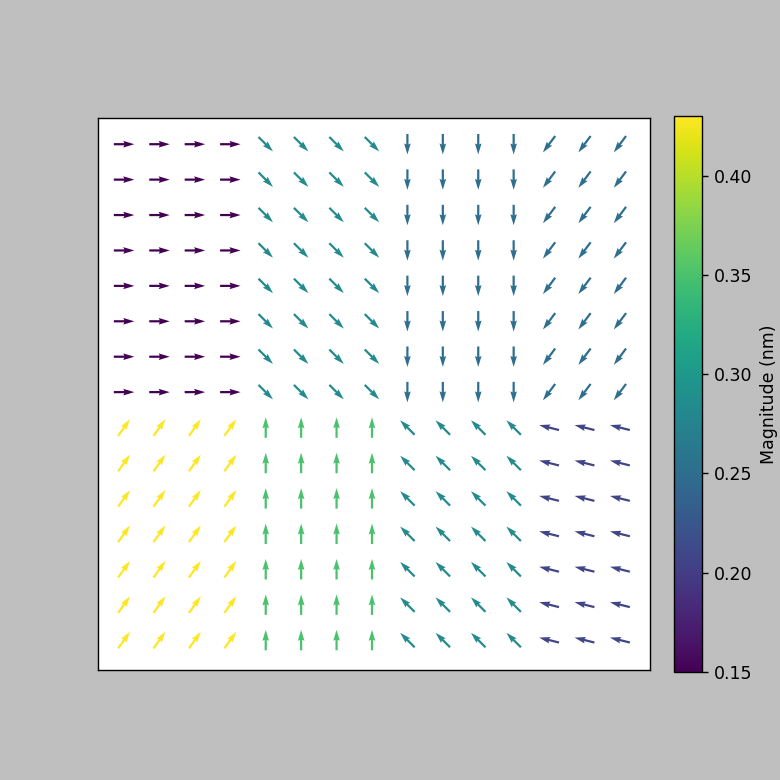

<AxesSubplot:>

In [10]:
#Vector plot with colormap viridis and unit vectors:

tml.plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=True, save=None, monitor_dpi=50,
                          plot_style='colormap', color='r',
                          overlay=False, cmap='viridis')


<IPython.core.display.Javascript object>


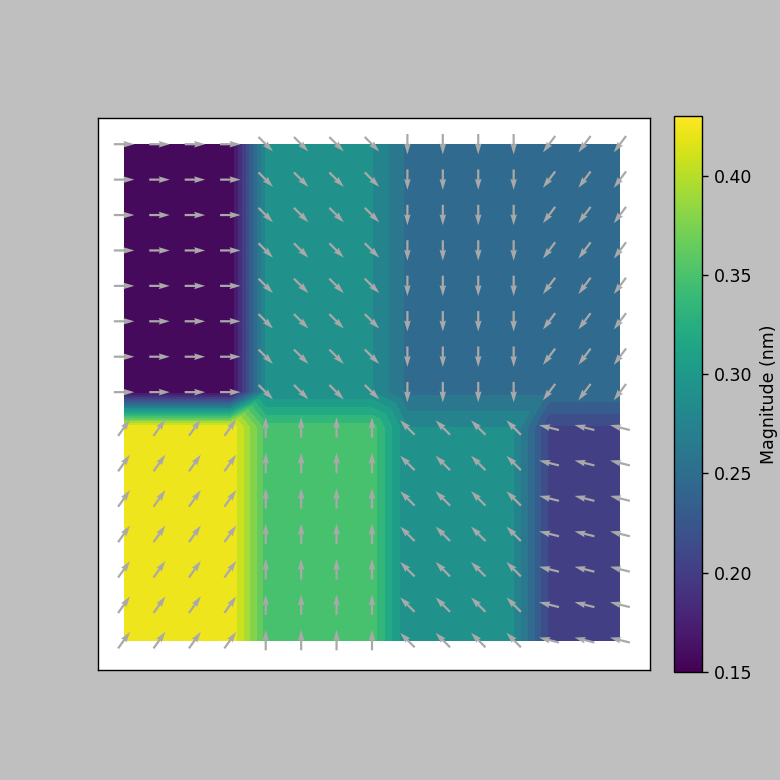

<AxesSubplot:>

In [11]:
#Change the vectors to unit vectors on a Matplotlib tricontourf map:

tml.plot_polarisation_vectors(x, y, u, v, image=image, unit_vector=True,
                          plot_style='contour', overlay=False,
                          pivot='middle', save=None, monitor_dpi=50,
                          color='darkgray', cmap='viridis')


<IPython.core.display.Javascript object>


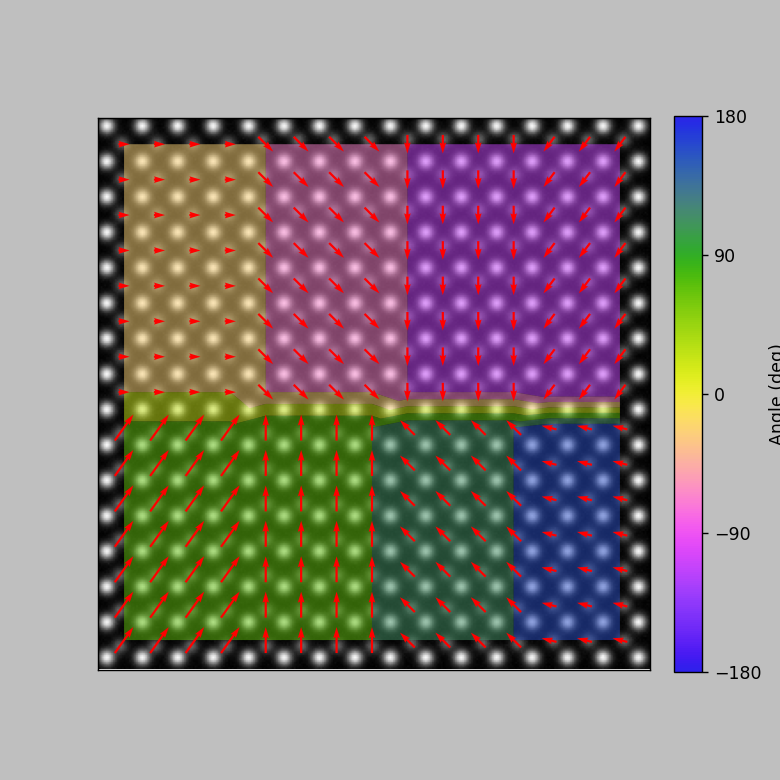

<AxesSubplot:>

In [12]:
# Plot a partly transparent angle tricontourf map with specified colorbar ticks and vector arrows:

tml.plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, plot_style='contour',
                          overlay=True, pivot='middle', save=None,
                          color='red', cmap='cet_colorwheel',
                          monitor_dpi=50, remove_vectors=False,
                          vector_rep="angle", alpha=0.5, levels=9,
                          antialiased=True, degrees=True,
                          ticks=[180, 90, 0, -90, -180])


<IPython.core.display.Javascript object>


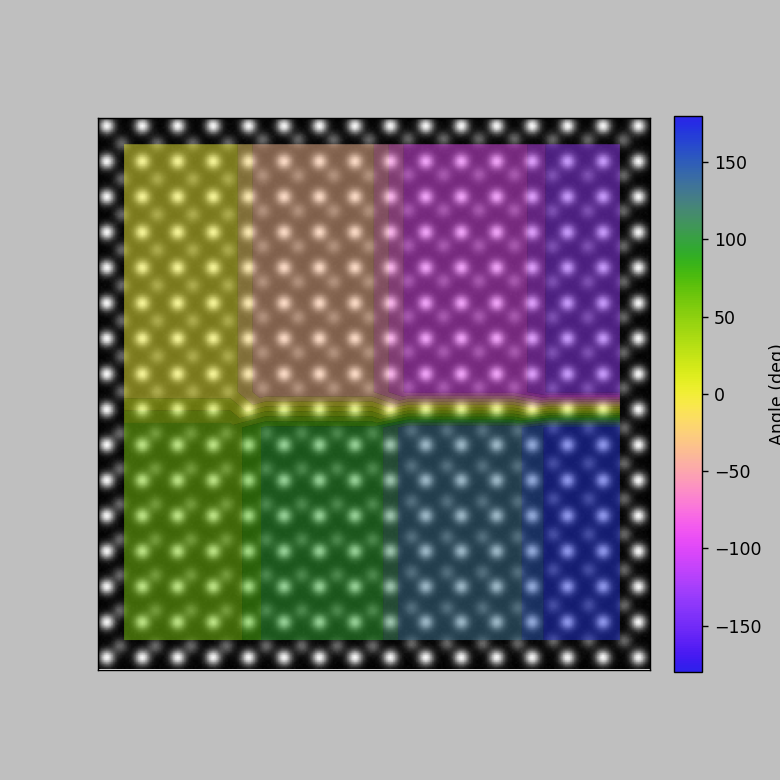

<AxesSubplot:>

In [13]:
# Plot a partly transparent angle tricontourf map with no vector arrows:

tml.plot_polarisation_vectors(x, y, u, v, image=image, remove_vectors=True,
                          unit_vector=True, plot_style='contour',
                          overlay=True, pivot='middle', save=None,
                          cmap='cet_colorwheel', alpha=0.5,
                          monitor_dpi=50, vector_rep="angle",
                          antialiased=True, degrees=True)


<IPython.core.display.Javascript object>


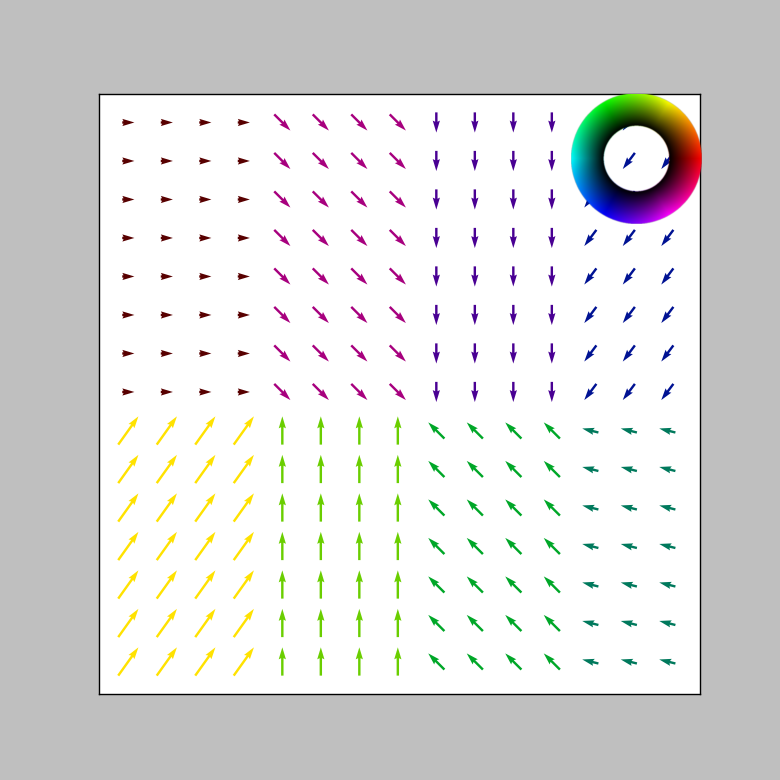

<AxesSubplot:>

In [14]:
# "polar_colorwheel" plot showing a 2D polar color wheel, also useful for visualising vortexes:

tml.plot_polarisation_vectors(x, y, u, v, image=image,
                          plot_style="polar_colorwheel",
                          unit_vector=False, overlay=False,
                          save=None, monitor_dpi=50)

<IPython.core.display.Javascript object>


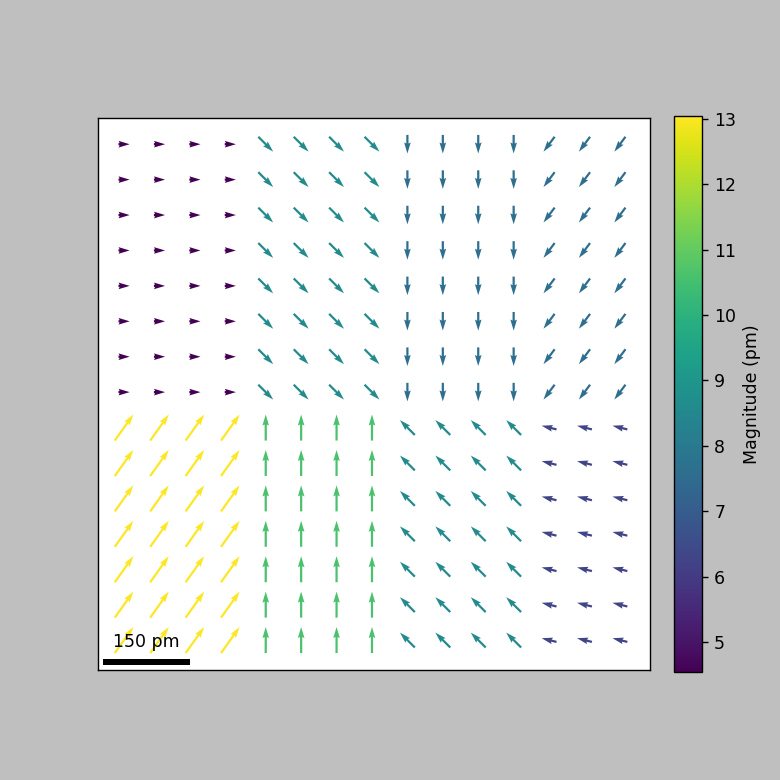

<AxesSubplot:>

In [15]:
# Plot with a custom scalebar. In this example, we need it to be dark, see matplotlib-scalebar for more custom features.

scbar_dict = {"dx": 3.0321, "units": "pm", "location": "lower left",
              "box_alpha":0.0, "color": "black", "scale_loc": "top"}

tml.plot_polarisation_vectors(x, y, u, v, image=sublatticeA.image,
                          sampling=3.0321, units='pm', monitor_dpi=50,
                          unit_vector=False, plot_style='colormap',
                          overlay=False, save=None, cmap='viridis',
                          scalebar=scbar_dict)


<IPython.core.display.Javascript object>


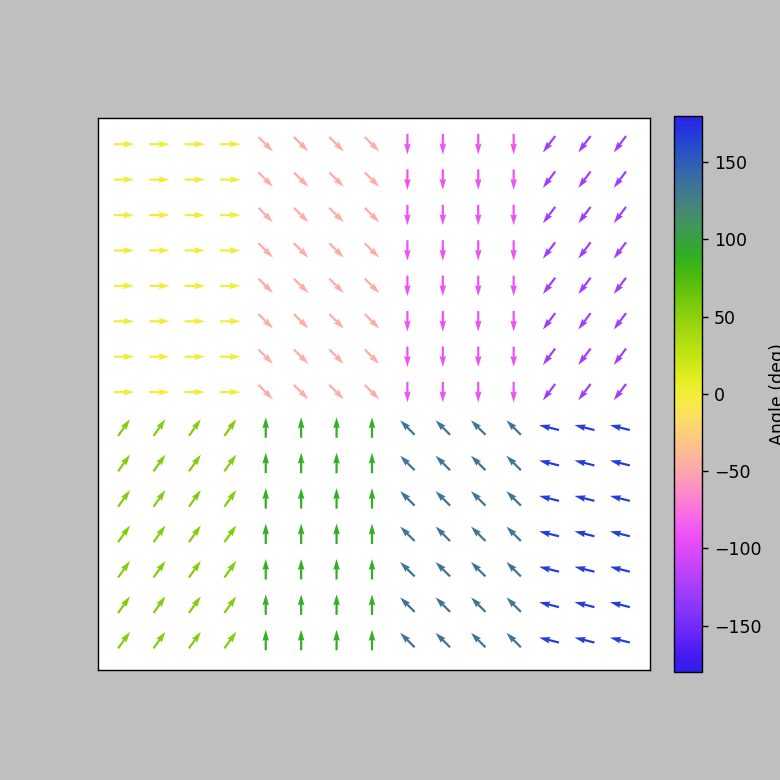

<AxesSubplot:>

In [16]:
# "colorwheel" plot of the vectors, useful for visualising vortexes:

import colorcet as cc

tml.plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=True, plot_style="colorwheel",
                          vector_rep="angle",
                          overlay=False, cmap=cc.cm.colorwheel,
                          degrees=True, save=None, monitor_dpi=50)


<IPython.core.display.Javascript object>


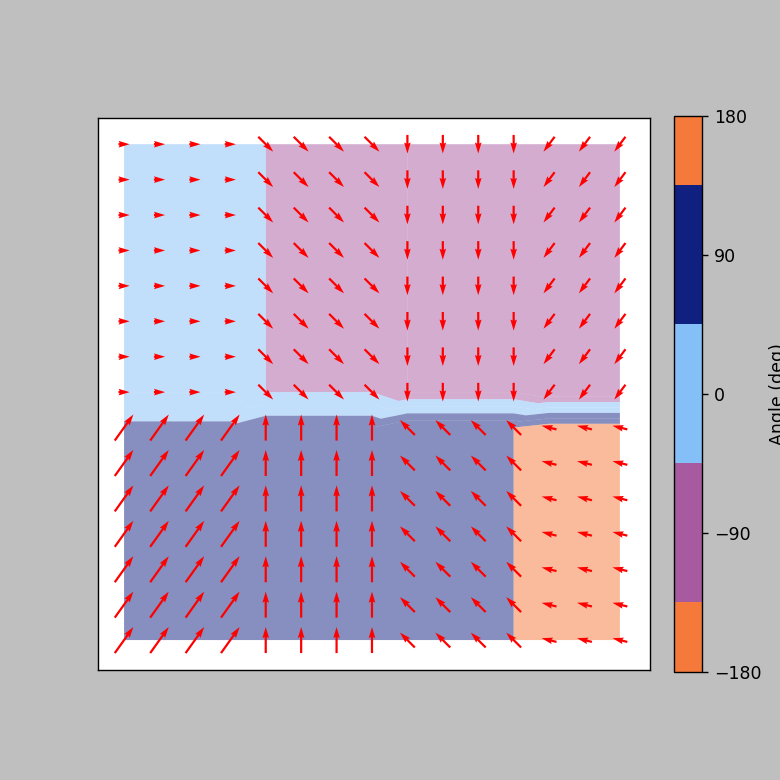

<AxesSubplot:>

In [17]:
# Plot a tricontourf for quadrant visualisation using a custom matplotlib cmap:

zest = tml.hex_to_rgb(tml.color_palettes('zesty'))
zest.append(zest[0])  # make the -180 and 180 degree colour the same
expanded_zest = tml.expand_palette(zest, [1,2,2,2,1])

custom_cmap, _ = from_levels_and_colors(
    levels=range(9), colors=tml.rgb_to_dec(expanded_zest))

tml.plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, plot_style='contour',
                          overlay=False, pivot='middle', save=None,
                          cmap=custom_cmap, levels=9, monitor_dpi=50,
                          vector_rep="angle", alpha=0.5, color='r',
                          antialiased=True, degrees=True,
                          ticks=[180, 90, 0, -90, -180])
